In [8]:
from rdkit import Chem
import pandas as pd

In [2]:
df = pd.read_csv('/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/Canonical_X12K_WDR5_AS-MS_Data.csv')
df

,Scan,Peptide,ALC (%),m/z,z,RT,Mass,ppm,Uniqueness,Name,Obs Parent Mass
0,2517,GVKGGQVMKGGVK,91,409.9232,3,18.09,1226.7458,1.5,UNIQUE,328-058_5-WDR5 results 2023-02-03 22-02,1226.7477
1,3837,GVGGKKVMASLTK,87,420.2676,3,25.99,1257.7769,3.3,UNIQUE,328-058_6-WDR5 results 2023-02-03 22-11,1257.7809
2,11892,VGGVAGLVLWVAK,95,634.3977,2,65.73,1266.7812,-0.3,UNIQUE,328-058_6-WDR5 results 2023-02-03 22-11,1266.7808
3,10788,GGGGFVTVWGHSK,85,644.3354,2,60.05,1286.6521,3.3,UNIQUE,328-058_6-WDR5 results 2023-02-03 22-11,1286.6562
4,3334,KQNDGSFTGVGAK,92,654.3406,2,23.16,1306.6628,2.9,UNIQUE,328-058_6-WDR5 results 2023-02-03 22-11,1306.6666
...,...,...,...,...,...,...,...,...,...,...,...
3785,11599,WWEEWTNWRYFYK,93,664.9780,3,66.48,1991.9106,0.8,UNIQUE,328-058_4-WDR5 results 2023-02-03 21-50,1991.9121
3786,9827,FVWYWMWWRMRYK,97,502.0151,4,57.41,2004.0312,0.0,UNIQUE,328-058_4-WDR5 results 2023-02-03 21-50,2004.0312
3787,12020,KWWWWLNWYHPWK,95,672.3401,3,66.19,2013.9944,2.0,UNIQUE,328-058_6-WDR5 results 2023-02-03 22-11,2013.9984
3788,9863,WWQNYHDFHWWWK,93,505.2316,4,57.67,2016.8960,0.7,UNIQUE,328-058_4-WDR5 results 2023-02-03 21-50,2016.8972


In [3]:
len(set(df['Peptide'])), len(df['Peptide'])

(3790, 3790)

In [4]:
smiles = []
for peptide in df['Peptide']:
    mol = Chem.MolFromSequence(peptide)
    smiles.append(Chem.MolToSmiles(mol))

In [38]:
docking_df = pd.DataFrame({'complex_name': df['Peptide'], 'protein_path': ['/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/6wjq_chain_A.pdb']*len(df), 'ligand_description': smiles, 'protein_sequence': [None]*len(df)})

In [39]:
# for i in range(0, len(docking_df), 500):
#     docking_df[i:min(i+500, len(docking_df))].to_csv(f'/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/6wjq_chain_A_docking_{i//500}.csv', index=False)

In [39]:
from Bio.PDB import PDBParser, PDBIO

def extract_chain(pdb_filename, output_filename, chain_id):
    # Create a PDB parser
    parser = PDBParser()

    # Parse the structure from file
    structure = parser.get_structure('PDB', pdb_filename)

    # Create a PDBIO object
    io = PDBIO()

    # Iterate over all models in the structure
    for model in structure:
        # We will write only the first model that contains chain A
        for chain in model:
            if chain.id == chain_id:
                # Set the structure for the output
                io.set_structure(chain)
                # Save the chain to a new file
                io.save(output_filename)
                return

# Example usage:
extract_chain('/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/6wjq.pdb', '/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/6wjq_chain_A.pdb', 'A')

/n/home13/afang/.conda/envs/interactenv1/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10067.
  warnings.warn(
/n/home13/afang/.conda/envs/interactenv1/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10085.
  warnings.warn(


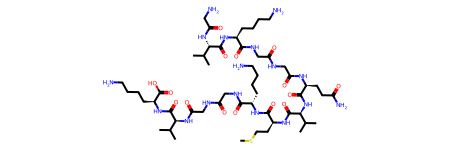

In [49]:
mol = Chem.MolFromSequence(df["Peptide"][0])
mol

## Get SMILES strings for non canonical peptides

In [23]:
NONCANONICAL_SMILES = {
    '2FF':'N[C@@H](Cc1ccccc1C(F)(F)F)C(=O)O',
    '3Py':'N[C@@H](Cc1cccnc1)C(=O)O',
    '4Af':'Nc1ccc(C[C@H](N)C(=O)O)cc1',
    'Aad':'N[C@@H](CCCC(=O)O)C(=O)O',
    'Agb':'N=C(N)NCC[C@H](N)C(=O)O',
    'Agn':'CC(=O)N[C@H]1[C@H](NC(=O)C[C@H](N)C(=O)O)O[C@H](CO)[C@@H](O)[C@@H]1O',
    'Aib':'CC(C)(N)C(=O)O',
    'Ala':'C[C@H](N)C(=O)O',
    'Amb':'NCc1ccc(C(=O)O)cc1',
    'Amf':'NCc1ccc(C[C@H](N)C(=O)O)cc1',
    'Apr':'N[C@@H]1CN[C@H](C(=O)O)C1',
    'Arg':'N=C(N)NCCC[C@H](N)C(=O)O',
    'Asn':'NC(=O)C[C@H](N)C(=O)O',
    'Asp':'N[C@@H](CC(=O)O)C(=O)O',
    'Aze':'O=C(O)C1CCN1',
    'Bpl':'N[C@@H](CCCCN(Cc1ccccn1)Cc1ccccn1)C(=O)O',
    'Cit':'NC(=O)NCCC[C@H](N)C(=O)O',
    'Cpa':'N[C@@H](CC1CC1)C(=O)O',
    'Cpg':'N[C@H](C(=O)O)C1CCCC1',
    'Cpz':'O=C(O)CN1CCNCC1',
    'Cxf':'N[C@@H](Cc1ccc(C(=O)O)cc1)C(=O)O',
    'Cys':'C([C@@H](C(=O)O)N)S',
    'Dab':'NCC[C@H](N)C(=O)O',
    'DfF':'N[C@@H](Cc1ccc(F)c(F)c1)C(=O)O',
    'Dmf':'COc1ccc(C[C@H](N)C(=O)O)cc1OC',
    'Dpf':'CCOP(=O)(Cc1ccc(C[C@H](N)C(=O)O)cc1)OCC',
    'Dph':'N[C@H](C(=O)O)C(c1ccccc1)c1ccccc1',
    'Git':'N[C@@H](CCCNC(=O)N[C@@H]1O[C@H](CO)[C@H](O)[C@H](O)[C@H]1O)C(=O)O',
    'Gln':'NC(=O)CC[C@H](N)C(=O)O',
    'Glu':'N[C@@H](CCC(=O)O)C(=O)O',
    'Gly':'NCC(=O)O',
    'Gph':'N=C(N)Nc1ccc(C[C@H](N)C(=O)O)cc1',
    'hAr':'N=C(N)NCCCC[C@H](N)C(=O)O',
    'Har':'N=C(N)NCCCC[C@H](N)C(=O)O',
    'hCi':'NC(=O)NCCCC[C@H](N)C(=O)O',
    'His':'N[C@@H](Cc1cnc[nH]1)C(=O)O',
    'hPh':'N[C@@H](CCc1ccccc1)C(=O)O',
    'Hyp':'O=C(O)[C@@H]1C[C@@H](O)CN1',
    'Ile':'CC[C@H](C)[C@@H](C(=O)O)N',
    'Leu':'CC(C)C[C@H](N)C(=O)O',
    'Lys':'NCCCC[C@H](N)C(=O)O',
    'Met':'CSCC[C@H](N)C(=O)O',
    'MfF':'N[C@@H](Cc1cccc(F)c1)C(=O)O',
    'Mox':'COCC[C@H](N)C(=O)O',
    'Msn':'CS(=O)(=O)CC[C@H](N)C(=O)O',
    'Nal':'N[C@@H](Cc1cccc2ccccc12)C(=O)O',
    'PfF':'N[C@@H](Cc1c(F)c(F)c(F)c(F)c1F)C(=O)O',
    'Phe':'N[C@@H](Cc1ccccc1)C(=O)O',
    'Php':'O=C(O)C1(c2ccccc2)CCNCC1',
    'Pip':'NC1(C(=O)O)CCNCC1',
    'Pro':'O=C(O)[C@@H]1CCCN1',
    'Psa':'NC[C@H](NS(=O)(=O)c1ccccc1)C(=O)O',
    'pSe':'N[C@@H](COP(=O)(O)O)C(=O)O',
    'Pty':'N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)O',
    'Ser':'N[C@@H](CO)C(=O)O',
    'Sty':'N[C@@H](C/C=C/c1ccccc1)C(=O)O',
    'Tff':'N[C@@H](Cc1cc(F)c(F)c(F)c1)C(=O)O',
    'Tfp':'N[C@@H](Cc1ccc(C(F)(F)F)cc1)C(=O)O',
    'Tha':'N[C@@H](Cc1cscn1)C(=O)O',
    'Thp':'NC1(C(=O)O)CCOCC1',
    'Thr':'C[C@@H](O)[C@H](N)C(=O)O',
    'Tic':'O=C(O)[C@@H]1Cc2ccccc2CN1',
    'Tle':'CC(C)(C)[C@H](N)C(=O)O',
    'Trp':'N[C@@H](Cc1c[nH]c2ccccc12)C(=O)O',
    'Tyr':'N[C@@H](Cc1ccc(O)cc1)C(=O)O',
    'Val':'CC(C)[C@H](N)C(=O)O',
}

UNMATCHED_NONCANONICAL_AAS = {"Aib","Amb","Cpz","Gly","Php","Pip","Psa","Thp"}

In [50]:
def get_amino_acid_backbone(molecule, monomers_aa):
    aa_backbone = "[$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H]([*])[CX3](=[OX1])[OX2H,OX1-,N]"
    # aa_backbone = '[NX3,NX4+][CX4H]([*])[CX3](=[OX1])[O,N]'
    aa_pattern = Chem.MolFromSmarts(aa_backbone)
    matches = molecule.GetSubstructMatches(aa_pattern)
    molecule = Chem.AddHs(molecule) # add Hs after SMARTS matching

    match_idx = 0
    curr_atoms = 0

    output = []
    for monomer in monomers_aa:
        backbone_indices = {}

        monomer_natoms = Chem.MolFromSmiles(NONCANONICAL_SMILES[monomer]).GetNumAtoms()
        if monomer in UNMATCHED_NONCANONICAL_AAS:
            match = list(range(curr_atoms, curr_atoms+monomer_natoms))
        else:
            match = matches[match_idx]
            match_idx += 1
        
        curr_atoms += monomer_natoms

        if monomer in ["Pip", "Psa"]: # these monomers have two NHX groups, the NH2 group is the amide forming one
            min_NHX = 2
        else:
            min_NHX = 1
        
        for atom in match:
            atom = molecule.GetAtomWithIdx(atom)
            if atom.GetSymbol() == 'N':
                H_neighbours = []
                for neighbour_atom in atom.GetNeighbors():
                    if neighbour_atom.GetSymbol() == 'H':
                        H_neighbours.append(neighbour_atom.GetIdx())
                if len(H_neighbours) >= min_NHX:
                    backbone_indices['NHX'] = [atom.GetIdx()] + H_neighbours
            elif atom.GetSymbol() == 'C':
                carbonyl_O = None
                alcohol_O = None
                alcohol_H = None
                for neighbour_atom in atom.GetNeighbors():
                    if neighbour_atom.GetSymbol() == 'O':
                        if len(neighbour_atom.GetNeighbors()) == 1:
                            carbonyl_O = neighbour_atom.GetIdx()
                        else:
                            func_group = sorted([(neighbour.GetSymbol(), neighbour.GetIdx()) for neighbour in neighbour_atom.GetNeighbors()])
                            if [x[0] for x in func_group] == ['C', 'H']:
                                alcohol_O = neighbour_atom.GetIdx()
                                alcohol_H = func_group[1][1]
                if (carbonyl_O is not None) and (alcohol_H is not None) and (alcohol_O is not None):
                    backbone_indices['COOH'] = [atom.GetIdx(), carbonyl_O, alcohol_O, alcohol_H]
        output.append(backbone_indices)
    return output

In [47]:
def get_peptide(*monomers_aa): 
    """
    Grows monomers from N to C terminus.
    Monomoers: list of smiles
    """
    monomers = [NONCANONICAL_SMILES[x] for x in monomers_aa]
    monomers = [Chem.MolFromSmiles(x) for x in monomers]
    molecule = Chem.CombineMols(monomers[0], monomers[1])
    for monomer in monomers[2:]:
        molecule = Chem.CombineMols(molecule, monomer)

    backbone_indexes = get_amino_acid_backbone(molecule, monomers_aa)
    assert len(backbone_indexes) == len(monomers), "num monomers does not match num backbone matches"
    molecule = Chem.AddHs(molecule) # add Hs after SMARTS matching
    molecule_edit = Chem.rdchem.EditableMol(molecule)

    to_remove = []
    for i in range(len(backbone_indexes)-1):
        C0, _, O0, H0 = backbone_indexes[i]['COOH']
        N1, H1 = backbone_indexes[i+1]['NHX'][:2]

        # C(monomer 0)-N(monomer 1) bond
        molecule_edit.AddBond(C0, N1, Chem.rdchem.BondType.SINGLE)

        # Remove the H from the NH2 group which forms the amide (monomer 1)
        # Remove the OH from the carboxylic acid (monomer 0)
        to_remove.extend([H1, O0, H0])
    # Must remove atoms in reverse order, otherwise the indices will change
    for atom in sorted(to_remove, reverse=True):
        molecule_edit.RemoveAtom(atom)

    peptide = molecule_edit.GetMol()
    peptide = Chem.RemoveHs(peptide)
    return peptide

### SMARTS string does not match these amino acids
We will ignore peptides with these for now, in the future need to define SMARTS string / ways to identify the backbone atoms for these

In [40]:
error_aas = []
for key, smiles in NONCANONICAL_SMILES.items():
    backbone = get_amino_acid_backbone(Chem.MolFromSmiles(smiles), [key])
    if len(backbone) != 1:
        print(key, smiles)
        error_aas.append(key)
    elif len(backbone[0]) != 2:
        print(key, smiles, backbone)

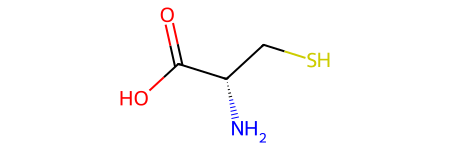

In [41]:
molecule = Chem.MolFromSmiles(noncanonical_smiles['Cys'])
molecule

* Aib CC(C)(N)C(=O)O - use all atoms
* Amb NCc1ccc(C(=O)O)cc1 - use all atoms
* Gly use all atoms
* Thp use all atoms
* Cpz use all atoms
* Php use all atoms

These are suspicious
* Pip is a little suspicious as there are two amine groups
* Psa is a little suspicious as there are two amine groups


In [42]:
import ast
noncanonical_df = pd.read_csv("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/Noncanonical X12K WDR5 AS-MS Data 3Letter.csv")
noncanonical_df['New_Peptide'] = noncanonical_df['New_Peptide'].apply(ast.literal_eval)

In [43]:
filtered_nc_peptides = []
for peptide in noncanonical_df['New_Peptide']:
    if all([aa not in error_aas for aa in peptide]):
        filtered_nc_peptides.append(peptide)
len(filtered_nc_peptides), len(noncanonical_df['New_Peptide'])

(742, 742)

In [51]:
filtered_nc_peptides_smiles = []
filtered_names = []
for peptide in filtered_nc_peptides:
    filtered_names.append("_".join(peptide))
    filtered_nc_peptides_smiles.append(Chem.MolToSmiles(get_peptide(*peptide)))

In [52]:
noncanonical_docking_df = pd.DataFrame({
    'complex_name': filtered_names, 'protein_path': ['/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/6wjq_chain_A.pdb']*len(filtered_names), 
    'ligand_description': filtered_nc_peptides_smiles, 'protein_sequence': [None]*len(filtered_names)})
noncanonical_docking_df.to_csv('/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/6wjq_chain_A_docking_noncanonical_filtered.csv', index=False)

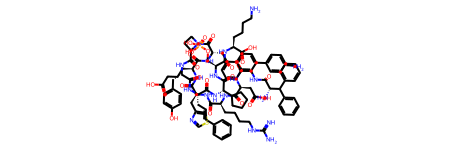

In [57]:
import random
smiles = random.choice(filtered_nc_peptides_smiles)
mol = Chem.MolFromSmiles(smiles)
mol

# Investigate Docked Structures with DiffDock

In [1]:
import glob
import pandas as pd

# canonical
dirs = glob.glob("/n/holyscratch01/mzitnik_lab/afang/WDR5_docked/**")
df = pd.read_csv("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/6wjq_chain_A_docking.csv")

# non-canonical
dirs = glob.glob("/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_noncanonical/**")
df = pd.read_csv("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/wdr_proteins/6wjq_chain_A_docking_noncanonical_filtered.csv")

In [2]:
import os
from rdkit import Chem

def read_sdf_and_get_coordinates(sdf_file):
    # Read the SDF file
    supplier = Chem.SDMolSupplier(sdf_file)
    molecules = [mol for mol in supplier if mol is not None]

    # Dictionary to store coordinates for each molecule
    molecule_coordinates = {}

    # Iterate through each molecule
    for idx, mol in enumerate(molecules):
        coords = []
        conf = mol.GetConformer()
        for atom in mol.GetAtoms():
            pos = conf.GetAtomPosition(atom.GetIdx())
            coords.append((pos.x, pos.y, pos.z))
        molecule_coordinates[f'Molecule_{idx}'] = coords

    return molecule_coordinates

coords = {}
for dir_ in dirs:
    files = os.listdir(dir_)
    if len(files) > 0:
        coords[dir_] = read_sdf_and_get_coordinates(os.path.join(dir_, "rank1.sdf"))


In [3]:
import numpy as np

means = {}
for key, val in coords.items():
    means[key] = np.array(val["Molecule_0"]).mean(axis=0)
all_mean = np.array(list(means.values())).mean(axis=0)

In [4]:
(all_mean - np.array(list(means.values()))).shape

(341, 3)

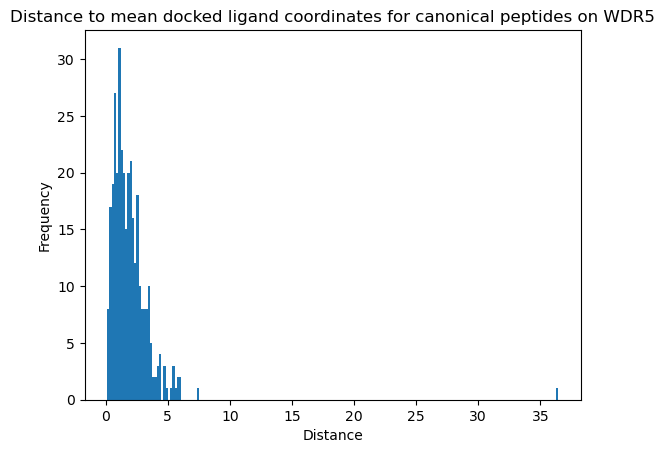

In [5]:
import matplotlib.pyplot as plt
plt.hist(np.linalg.norm(all_mean - np.array(list(means.values())), axis=1), bins=200)
plt.title("Distance to mean docked ligand coordinates for canonical peptides on WDR5")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

In [6]:
count = 0
for key, val in means.items():
    dist = np.linalg.norm(val - all_mean)
    if dist > 10:
        count += 1
        files = os.listdir(key)
        for file in sorted(files):
            if file.startswith("rank3"):
                break
            if file.endswith(".sdf") and "confidence" in file:
                coords = read_sdf_and_get_coordinates(os.path.join(key, file))
                try:
                    mean = np.array(coords["Molecule_0"]).mean(axis=0)
                    dist = np.linalg.norm(mean - all_mean)
                    print(key, file, dist)
                except Exception as e:
                    print(key, file, e)

/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_noncanonical/Tfp_Ala_Aze_Amf_Ala_Tyr_Ala_Cxf_Tff_Tic_Asp_Sty_Lys rank10_confidence-4.74.sdf 1.6298504980889341
/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_noncanonical/Tfp_Ala_Aze_Amf_Ala_Tyr_Ala_Cxf_Tff_Tic_Asp_Sty_Lys rank1_confidence-4.03.sdf 36.419569958222205
/n/holyscratch01/mzitnik_lab/afang/WDR5_docked_noncanonical/Tfp_Ala_Aze_Amf_Ala_Tyr_Ala_Cxf_Tff_Tic_Asp_Sty_Lys rank2_confidence-4.18.sdf 3.497839102890746


In [13]:
count

50